In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io 
from PIL import Image 
import numpy as np

In [2]:
demo_fruitnut = pd.read_csv('../data/fruittreenuttotals_demographics.csv')
demo_berries = pd.read_csv('../data/demographics_berries.csv')
demo_citrus = pd.read_csv('../data/demographics_citrus.csv')
demo_vegetables = pd.read_csv('../data/demographics_vegetables.csv')
all_commoditites = pd.read_csv('../data/commodity_totals.csv')

In [3]:
demo_fruitnut['Organization Type'] = demo_fruitnut['Domain Category'].map(lambda x: 'Corporation' if 'CORPORATION' in x
                                                                              else 'Family & Individual' if 'FAMILY & INDIVIDUAL' in x
                                                                              else 'Partnership' if 'PARTNERSHIP' in x
                                                                              else 'Institutional & Researach & Reservation' if 'INSTITUTIONAL & RESEARCH & RESERVATION' in x
                                                                              else "")
demo_berries['Organization Type'] = demo_berries['Domain Category'].map(lambda x: 'Corporation' if 'CORPORATION' in x
                                                                              else 'Family & Individual' if 'FAMILY & INDIVIDUAL' in x
                                                                              else 'Partnership' if 'PARTNERSHIP' in x
                                                                              else 'Institutional & Researach & Reservation' if 'INSTITUTIONAL & RESEARCH & RESERVATION' in x
                                                                              else "")
demo_citrus['Organization Type'] = demo_citrus['Domain Category'].map(lambda x: 'Corporation' if 'CORPORATION' in x
                                                                              else 'Family & Individual' if 'FAMILY & INDIVIDUAL' in x
                                                                              else 'Partnership' if 'PARTNERSHIP' in x
                                                                              else 'Institutional & Researach & Reservation' if 'INSTITUTIONAL & RESEARCH & RESERVATION' in x
                                                                              else "")
demo_vegetables['Organization Type'] = demo_vegetables['Domain Category'].map(lambda x: 'Corporation' if 'CORPORATION' in x
                                                                              else 'Family & Individual' if 'FAMILY & INDIVIDUAL' in x
                                                                              else 'Partnership' if 'PARTNERSHIP' in x
                                                                              else 'Institutional & Researach & Reservation' if 'INSTITUTIONAL & RESEARCH & RESERVATION' in x
                                                                              else "")
all_commoditites['Farm Size'] = all_commoditites['Domain Category'].map(lambda x: '1.0 TO 9.9 ACRES' if '1.0 TO 9.9 ACRES' in x
                                                                              else '10.0 TO 49.9 ACRES' if '10.0 TO 49.9 ACRES' in x
                                                                              else '50.0 TO 69.9 ACRES' if '50.0 TO 69.9 ACRES' in x
                                                                              else '70.0 TO 99.9 ACRES' if '70.0 TO 99.9 ACRES' in x
                                                                              else '100 TO 139 ACRES' if '100 TO 139 ACRES' in x
                                                                              else '140 TO 179 ACRES' if '140 TO 179 ACRES' in x
                                                                              else '180 TO 219 ACRES' if '180 TO 219 ACRES' in x
                                                                              else '220 TO 259 ACRES' if '220 TO 259 ACRES' in x
                                                                              else '260 TO 499 ACRES' if '260 TO 499 ACRES' in x
                                                                              else '500 TO 999 ACRES' if '500 TO 999 ACRES' in x
                                                                              else '1,000 TO 1,999 ACRES' if '1,000 TO 1,999 ACRES' in x
                                                                              else '2,000 OR MORE ACRES' if '2,000 OR MORE ACRES' in x
                                                                              else "")
all_commoditites['Income Bracket'] = all_commoditites['Domain Category'].map(lambda x: '0-49,999' if 'LESS THAN 1,000 $' in x
                                                                              else '0-49,999' if '1,000 TO 2,499 $' in x
                                                                              else '0-49,999' if '2,500 TO 4,999 $' in x
                                                                              else '0-49,999' if '5,000 TO 9,999 $' in x
                                                                              else '0-49,999' if '10,000 TO 19,999 $' in x
                                                                              else '0-49,999' if '10,000 TO 24,999 $' in x
                                                                              else '0-49,999' if '20,000 TO 24,999 $' in x
                                                                              else '0-49,999' if '25,000 TO 39,999 $' in x
                                                                              else '0-49,999' if '25,000 TO 49,999 $' in x
                                                                              else '0-49,999' if '40,000 TO 49,999 $' in x
                                                                              else '50,000-99,999' if '50,000 TO 99,999 $' in x
                                                                              else '100,000-249,999' if '100,000 TO 249,999 $' in x
                                                                              else '250,000-499,999' if '250,000 TO 499,999 $' in x
                                                                              else '500,000 OR MORE' if '500,000 OR MORE $' in x
                                                                              else '500,000-999,999' if '500,000 TO 999,999 $' in x
                                                                              else '1,000,000 OR MORE' if '1,000,000 OR MORE $' in x
                                                                              else '1,000,000-2,499,999' if '1,000,000 TO 2,499,999 $' in x
                                                                              else '2,500,000-4,999,999' if '2,500,000 TO 4,999,999 $' in x
                                                                              else '5,000,000 OR MORE' if '5,000,000 OR MORE $' in x
                                                                              else "")

In [4]:
citrus_state = pd.read_csv('../data/fruit/citrus_state.csv')

In [5]:
citrus_area_state = citrus_state.loc[(citrus_state['Data Item'] == 'CITRUS TOTALS - ACRES BEARING & NON-BEARING')
                    & (citrus_state['Domain'] == 'TOTAL')]

In [6]:
citrus_area_state = citrus_area_state.loc[citrus_area_state['Value'] != ' (D)']
citrus_area_state = citrus_area_state.loc[citrus_area_state['Value'] != ' (Z)']
citrus_area_state['Value'] = citrus_area_state['Value'].str.replace(',', '')
citrus_area_state['Value'] = pd.to_numeric(citrus_area_state.Value, downcast='integer').fillna(0)
citrus_area_state

,Program,Year,Period,Week Ending,Geo Level,State,State ANSI,Ag District,Ag District Code,County,...,Zip Code,Region,watershed_code,Watershed,Commodity,Data Item,Domain,Domain Category,Value,CV (%)
38,CENSUS,2022,YEAR,NaN,STATE,ALABAMA,1,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,309,9.2
144,CENSUS,2022,YEAR,NaN,STATE,ARIZONA,4,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,7257,34.1
315,CENSUS,2022,YEAR,NaN,STATE,CALIFORNIA,6,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,341591,12.7
496,CENSUS,2022,YEAR,NaN,STATE,FLORIDA,12,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,382803,14.5
647,CENSUS,2022,YEAR,NaN,STATE,GEORGIA,13,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,1583,23.5
739,CENSUS,2022,YEAR,NaN,STATE,HAWAII,15,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,9649,1.0
827,CENSUS,2022,YEAR,NaN,STATE,LOUISIANA,22,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,549,42.1
904,CENSUS,2022,YEAR,NaN,STATE,MISSISSIPPI,28,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,69,41.9
1004,CENSUS,2022,YEAR,NaN,STATE,SOUTH CAROLINA,45,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,11,57.9
1098,CENSUS,2022,YEAR,NaN,STATE,TEXAS,48,NaN,NaN,NaN,...,NaN,NaN,0,NaN,CITRUS TOTALS,CITRUS TOTALS - ACRES BEARING & NON-BEARING,TOTAL,NOT SPECIFIED,27060,6.8


In [7]:
citrus_area_state.to_csv(path_or_buf = 'citrus_area_state.csv', index = False)

In [8]:
comm_income_by_sales = all_commoditites.loc[all_commoditites['Domain'] == 'FARM SALES']
comm_income_by_sales['Income Bracket'].unique()

array(['0-49,999', '1,000,000 OR MORE', '1,000,000-2,499,999',
       '100,000-249,999', '2,500,000-4,999,999', '250,000-499,999',
       '5,000,000 OR MORE', '50,000-99,999', '500,000 OR MORE',
       '500,000-999,999'], dtype=object)

In [9]:
comm_income_by_sales = comm_income_by_sales.loc[comm_income_by_sales['Value'] != ' (D)']
comm_income_by_sales = comm_income_by_sales.loc[comm_income_by_sales['Value'] != ' (Z)']
comm_income_by_sales['Value'] = comm_income_by_sales['Value'].str.replace(',', '')
comm_income_by_sales['Value'] = pd.to_numeric(comm_income_by_sales.Value, downcast='integer').fillna(0)
comm_income_by_sales = comm_income_by_sales.groupby(
                ['Year','Income Bracket']).sum(
                'Value').fillna(0).reset_index()
comm_income_by_sales_piv = comm_income_by_sales.pivot(index = 'Year', columns = 'Income Bracket', values = 'Value').reset_index()
comm_income_by_sales_piv

Income Bracket,Year,"0-49,999","1,000,000 OR MORE","1,000,000-2,499,999","100,000-249,999","2,500,000-4,999,999","250,000-499,999","5,000,000 OR MORE","50,000-99,999","500,000 OR MORE","500,000-999,999"
0,1997,14446907000,82824271000,28603612000,30406176000,13850777000,31848311000,40369882000,11716046000,112962373000,30138101000
1,2002,12486273000,95259672000,30618426000,25401608000,15700332000,28530105000,48940914000,10024295000,124204073000,28944401000
2,2007,12145834000,175799795000,60549290000,24212940000,32299503000,33409883000,82951002000,8961255000,218490577000,42690783000
3,2012,21241374000,262005697000,87935245000,22822425000,49020022000,33964264000,125050429000,9250546000,316691570000,54685873000
4,2017,20044721000,266921684000,83247569000,21171316000,48723643000,31318548000,134950472000,8477635000,316260682000,49338998000
5,2022,19637566000,425365347000,95707152000,19715890000,100922303000,30549461000,228735891000,8237216000,473614327000,48248980000


In [10]:
comm_income_by_sales_piv = comm_income_by_sales_piv[['Year', 
                                                     '0-49,999', 
                                                     '50,000-99,999', 
                                                     '100,000-249,999', 
                                                     '250,000-499,999',
                                                     '500,000-999,999',
                                                     '500,000 OR MORE',
                                                     '1,000,000-2,499,999',
                                                     '2,500,000-4,999,999',
                                                     '1,000,000 OR MORE',
                                                     '5,000,000 OR MORE'
                                                     ]]
comm_income_by_sales_piv

Income Bracket,Year,"0-49,999","50,000-99,999","100,000-249,999","250,000-499,999","500,000-999,999","500,000 OR MORE","1,000,000-2,499,999","2,500,000-4,999,999","1,000,000 OR MORE","5,000,000 OR MORE"
0,1997,14446907000,11716046000,30406176000,31848311000,30138101000,112962373000,28603612000,13850777000,82824271000,40369882000
1,2002,12486273000,10024295000,25401608000,28530105000,28944401000,124204073000,30618426000,15700332000,95259672000,48940914000
2,2007,12145834000,8961255000,24212940000,33409883000,42690783000,218490577000,60549290000,32299503000,175799795000,82951002000
3,2012,21241374000,9250546000,22822425000,33964264000,54685873000,316691570000,87935245000,49020022000,262005697000,125050429000
4,2017,20044721000,8477635000,21171316000,31318548000,49338998000,316260682000,83247569000,48723643000,266921684000,134950472000
5,2022,19637566000,8237216000,19715890000,30549461000,48248980000,473614327000,95707152000,100922303000,425365347000,228735891000


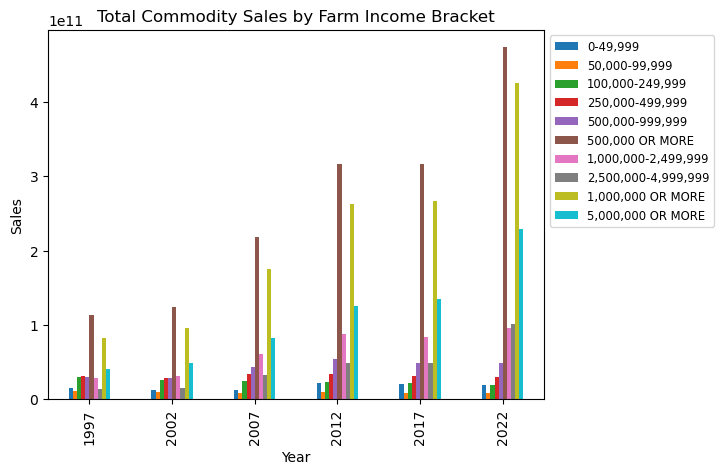

In [34]:
comm_income_by_sales_plot = comm_income_by_sales_piv.plot(x = 'Year', y = list(
    comm_income_by_sales_piv.columns[1:11]), kind = "bar", title = "Total Commodity Sales by Farm Income Bracket",
                                                 ylabel = "Sales").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
comm_income_by_sales_plot.savefig('comm_income_by_sales_plot.png', transparent=True, bbox_inches='tight')

In [12]:
vegetable_sales = demo_vegetables.loc[(demo_vegetables['Data Item'] == 'VEGETABLE TOTALS, INCL SEEDS & TRANSPLANTS, IN THE OPEN - SALES, MEASURED IN $')
                    & (demo_vegetables['Domain'] == 'ORGANIZATION')]

In [13]:
vegetable_sales['Organization Type'].unique()

array(['Corporation', 'Family & Individual',
       'Institutional & Researach & Reservation', 'Partnership'],
      dtype=object)

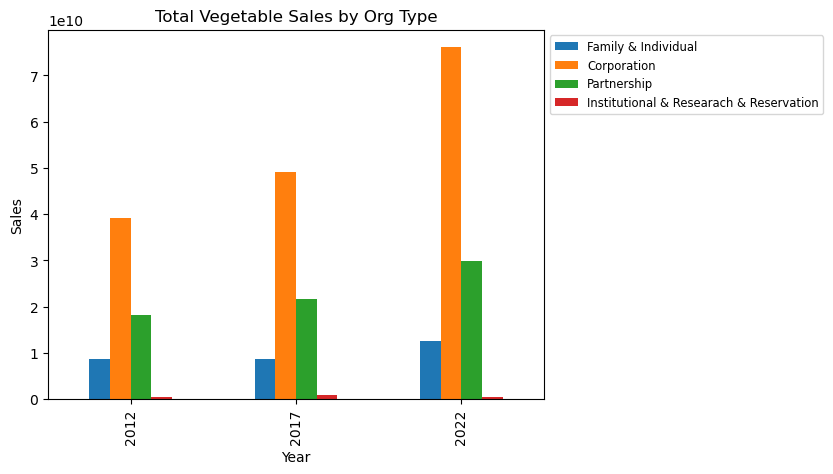

In [14]:
vegetable_sales = vegetable_sales.loc[vegetable_sales['Value'] != ' (D)']
vegetable_sales = vegetable_sales.loc[vegetable_sales['Value'] != ' (Z)']
vegetable_sales['Value'] = vegetable_sales['Value'].str.replace(',', '')
vegetable_sales['Value'] = pd.to_numeric(vegetable_sales.Value, downcast='integer').fillna(0)
vegetable_sales = vegetable_sales.groupby(
                ['Year','Organization Type']).sum(
                'Value').fillna(0).reset_index()
vegetable_sales_piv = vegetable_sales.pivot(index = 'Year', columns = 'Organization Type', values = 'Value').reset_index()
vegetable_sales_piv = vegetable_sales_piv[['Year', 'Family & Individual', 'Corporation', 'Partnership', 'Institutional & Researach & Reservation']]
vegetable_sales_plot = vegetable_sales_piv.plot(x = 'Year', y = list(
    vegetable_sales_piv.columns[1:5]), kind = "bar", title = "Total Vegetable Sales by Org Type",
                                                 ylabel = "Sales").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
vegetable_sales_plot.savefig('vegetable_sales_plot.png', transparent=True, bbox_inches='tight')

In [15]:
fruit_sales = demo_fruitnut.loc[(demo_fruitnut['Data Item'] == 'FRUIT & TREE NUT TOTALS - SALES, MEASURED IN $')
                    & (demo_fruitnut['Domain'] == 'ORGANIZATION')]

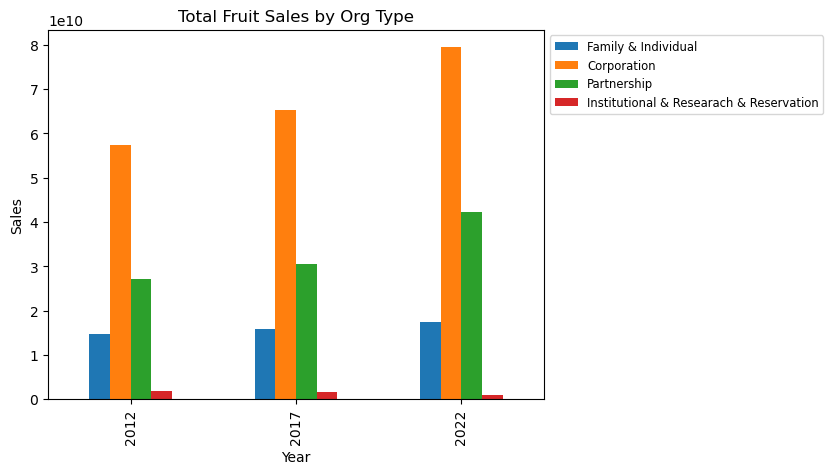

In [16]:
fruit_sales = fruit_sales.loc[fruit_sales['Value'] != ' (D)']
fruit_sales = fruit_sales.loc[fruit_sales['Value'] != ' (Z)']
fruit_sales['Value'] = fruit_sales['Value'].str.replace(',', '')
fruit_sales['Value'] = pd.to_numeric(fruit_sales.Value, downcast='integer').fillna(0)
fruit_sales = fruit_sales.groupby(
                ['Year','Organization Type']).sum(
                'Value').fillna(0).reset_index()
fruit_sales_piv = fruit_sales.pivot(index = 'Year', columns = 'Organization Type', values = 'Value').reset_index()
fruit_sales_piv = fruit_sales_piv[['Year', 'Family & Individual', 'Corporation', 'Partnership', 'Institutional & Researach & Reservation']]
fruit_sales_plot = fruit_sales_piv.plot(x = 'Year', y = list(
    fruit_sales_piv.columns[1:5]), kind = "bar", title = "Total Fruit Sales by Org Type",
                                                 ylabel = "Sales").legend(
    bbox_to_anchor = (1.0,1.0),
    fontsize = 'small').get_figure()
fruit_sales_plot.savefig('fruit_sales_plot.png', transparent=True, bbox_inches='tight')